# THE DARK SIDE OF ALGORITHMIC TRADING SECRETS WALL STREET WONT’T TELL YOU


### Import Libraries 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


## Financial Data (2016 - 2024)
# for Apple 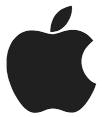 , Netflix 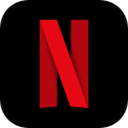, and NVIDIA 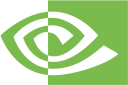

In [29]:
tickers = ['AAPL', 'NFLX', 'NVDA']
start_date = '2016-01-01'
end_date = '2024-01-01'

# Downloading the stock data
stock_data = yf.download(tickers, start=start_date, end=end_date)

# first few rows of the data
stock_data.head()


[*********************100%***********************]  3 of 3 completed


Price                      Adj Close                            Close  \
Ticker                          AAPL        NFLX      NVDA       AAPL   
Date                                                                    
2016-01-04 00:00:00+00:00  23.886831  109.959999  0.789926  26.337500   
2016-01-05 00:00:00+00:00  23.288242  107.660004  0.802615  25.677500   
2016-01-06 00:00:00+00:00  22.832504  117.680000  0.769427  25.174999   
2016-01-07 00:00:00+00:00  21.868864  114.559998  0.738923  24.112499   
2016-01-08 00:00:00+00:00  21.984503  111.389999  0.723061  24.240000   

Price                                                High              \
Ticker                           NFLX     NVDA       AAPL        NFLX   
Date                                                                    
2016-01-04 00:00:00+00:00  109.959999  0.80925  26.342501  110.000000   
2016-01-05 00:00:00+00:00  107.660004  0.82225  26.462500  110.580002   
2016-01-06 00:00:00+00:00  117.680000  0.78825  25.592501  117.910004   
2016-01-07 00:00:00+00:00  114.559998  0.75700  25.032499  122.180000   
2016-01-08 00:00:00+00:00  111.389999  0.74075  24.777500  117.720001   

Price                                     Low                            Open  \
Ticker                        NVDA       AAPL        NFLX     NVDA       AAPL   
Date                                                                            
2016-01-04 00:00:00+00:00  0.81450  25.500000  105.209999  0.80100  25.652500   
2016-01-05 00:00:00+00:00  0.83600  25.602501  105.849998  0.81250  26.437500   
2016-01-06 00:00:00+00:00  0.81250  24.967501  104.959999  0.77900  25.139999   
2016-01-07 00:00:00+00:00  0.77375  24.107500  112.290001  0.74700  24.670000   
2016-01-08 00:00:00+00:00  0.76750  24.190001  111.099998  0.73925  24.637501   

Price                                              Volume                       
Ticker                           NFLX     NVDA       AAPL      NFLX       NVDA  
Date                                                                            
2016-01-04 00:00:00+00:00  109.000000  0.80725  270597600  20794800  358076000  
2016-01-05 00:00:00+00:00  110.449997  0.82450  223164000  17664600  490272000  
2016-01-06 00:00:00+00:00  105.290001  0.80875  273829600  33045700  449344000  
2016-01-07 00:00:00+00:00  116.360001  0.76850  324377600  33636700  645304000  
2016-01-08 00:00:00+00:00  116.330002  0.76675  283192000  18067100  398472000

## Calculating Moving Averages

In [32]:
# Calculating the moving averages for each company
for ticker in tickers:
    stock_data[f'{ticker}_SMA_50'] = stock_data['Close'][ticker].rolling(window=50).mean()
    stock_data[f'{ticker}_SMA_200'] = stock_data['Close'][ticker].rolling(window=200).mean()

# data shown with moving averages
stock_data.tail()
stock_data.to_csv('/Users/chethankarunakara/Desktop/WallStreet_Secret/MovingAVG_data.csv')


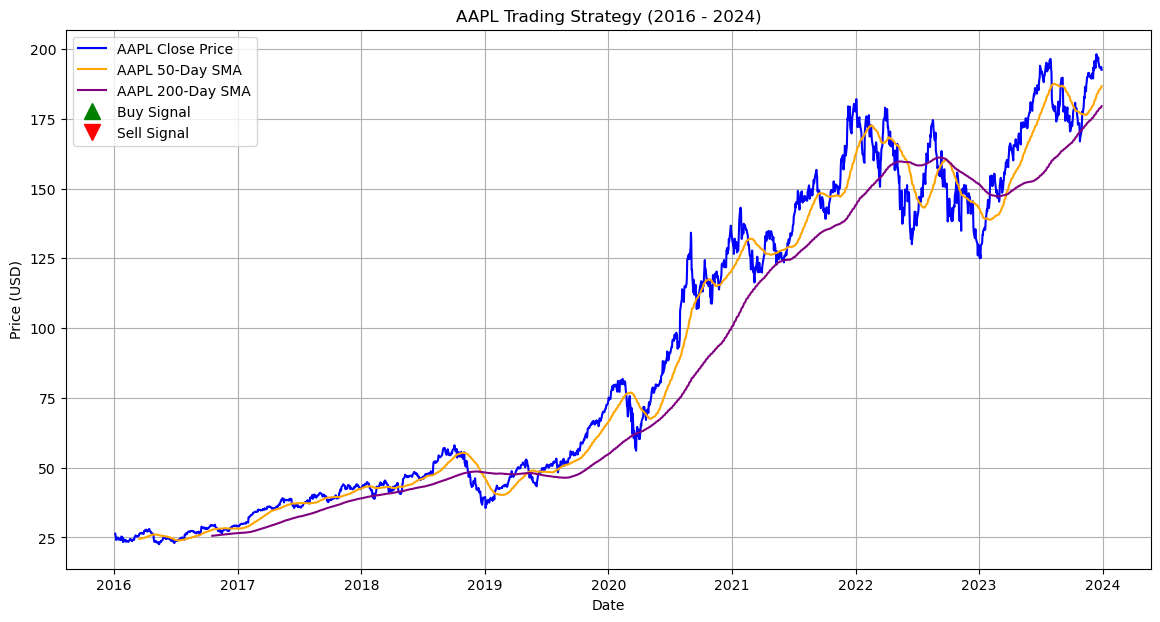

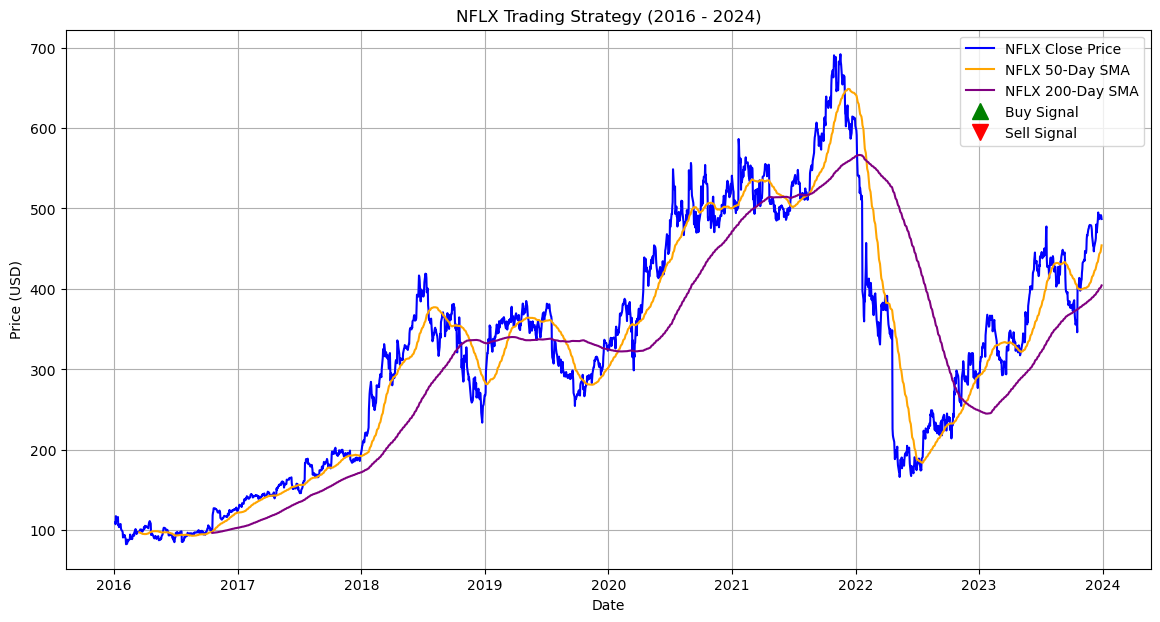

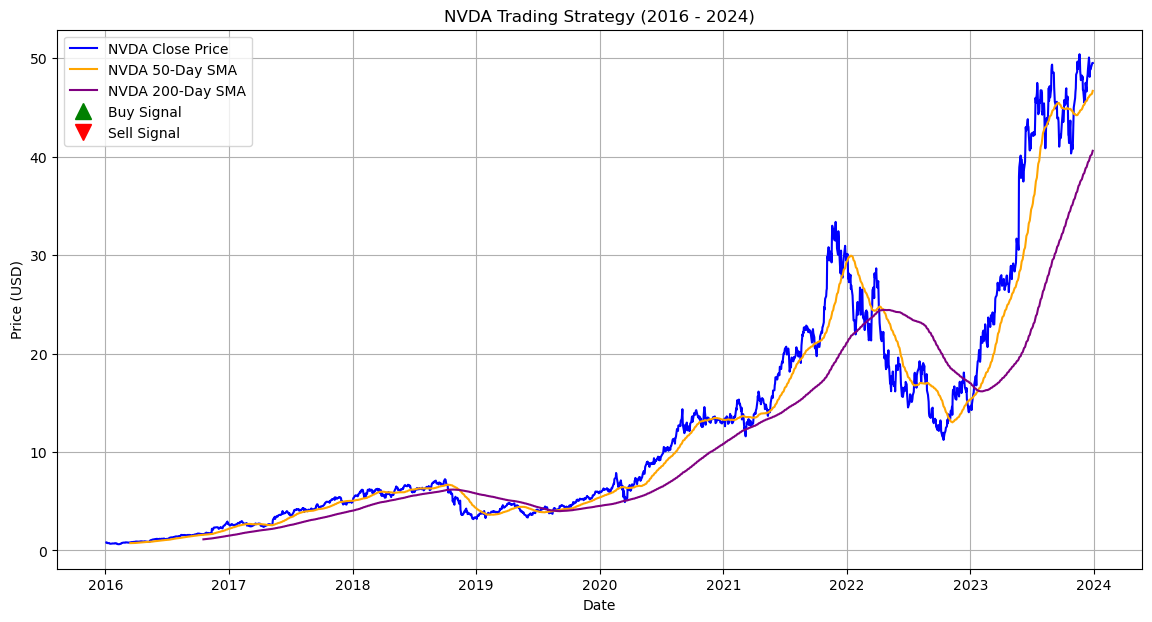

In [45]:
for ticker in tickers:
    plt.figure(figsize=(14, 7))

    # Plot the closing price and moving averages
    plt.plot(stock_data.index, stock_data['Close'][ticker], label=f'{ticker} Close Price', color='blue')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_50'], label=f'{ticker} 50-Day SMA', color='orange')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_200'], label=f'{ticker} 200-Day SMA', color='purple')

    # Plot the buy signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == 1].index, 
             stock_data[f'{ticker}_SMA_50'][stock_data[f'{ticker}_Position'] == 1], 
             '^', markersize=12, color='g', lw=0, label='Buy Signal')

    # Plot the sell signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == -1].index, 
             stock_data[f'{ticker}_SMA_50'][stock_data[f'{ticker}_Position'] == -1], 
             'v', markersize=12, color='r', lw=0, label='Sell Signal')

    plt.title(f'{ticker} Trading Strategy (2016 - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()



## Generating Buy/Sell Signals

In [35]:
# Generate buy/sell signals for each company
for ticker in tickers:
    stock_data[f'{ticker}_Signal'] = 0  # Initialize the Signal column
    condition = stock_data[f'{ticker}_SMA_50'] > stock_data[f'{ticker}_SMA_200']
    stock_data.loc[condition, f'{ticker}_Signal'] = 1
    stock_data.loc[~condition, f'{ticker}_Signal'] = -1
    stock_data[f'{ticker}_Position'] = stock_data[f'{ticker}_Signal'].diff()


**Check Position Calculation**

In [36]:
# Ensure position is calculated correctly
for ticker in tickers:
    stock_data[f'{ticker}_Position'] = stock_data[f'{ticker}_Signal'].diff()


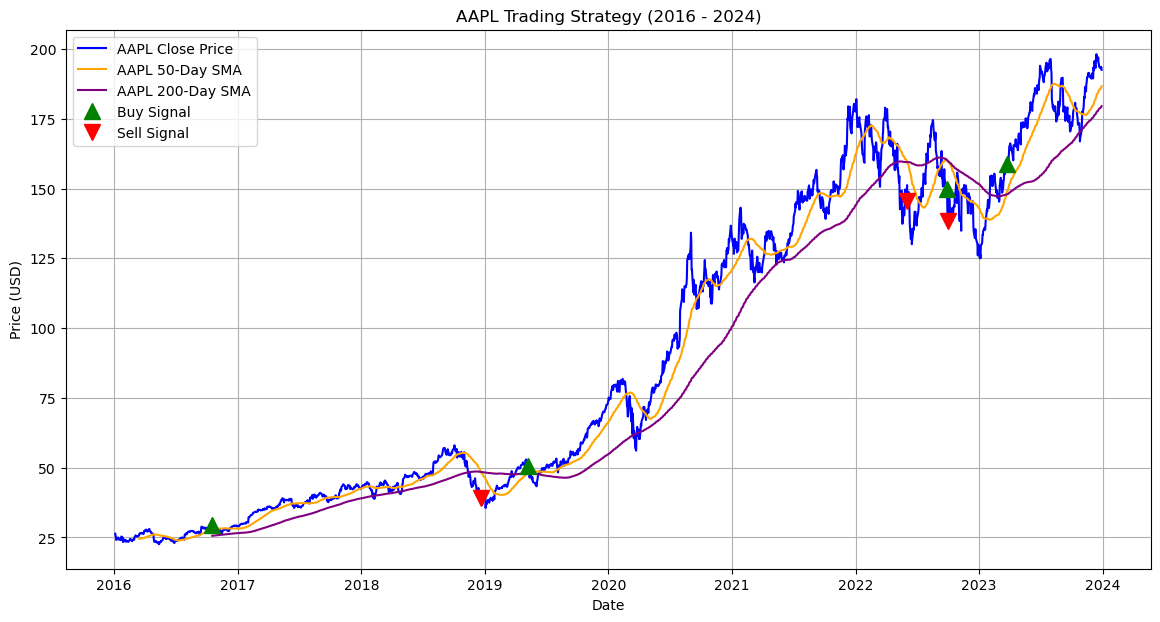

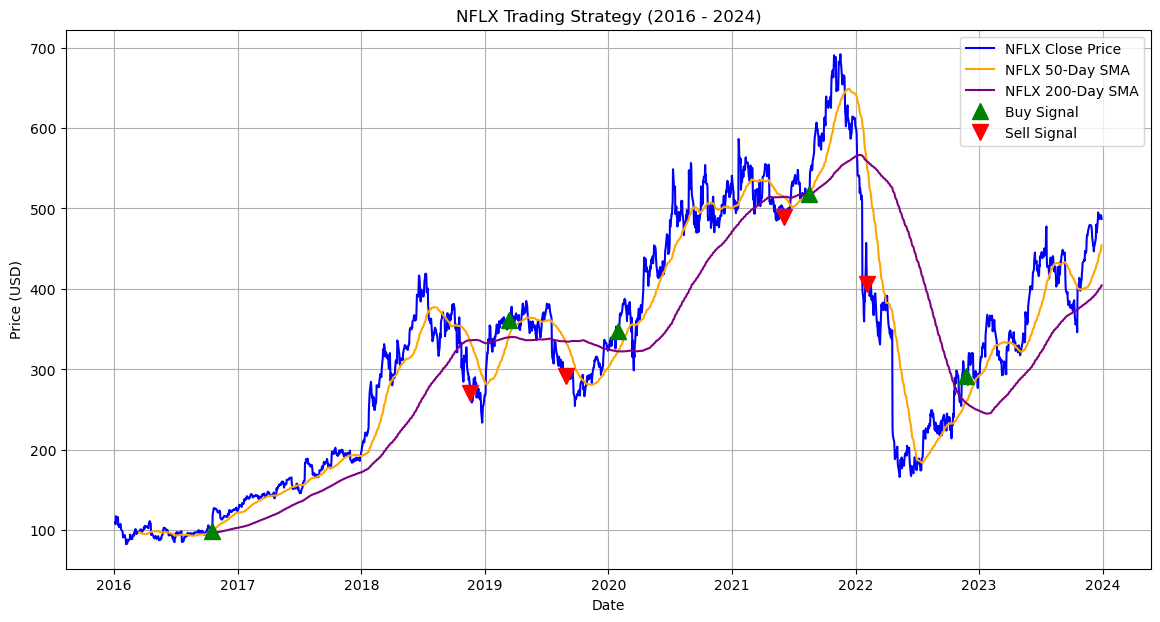

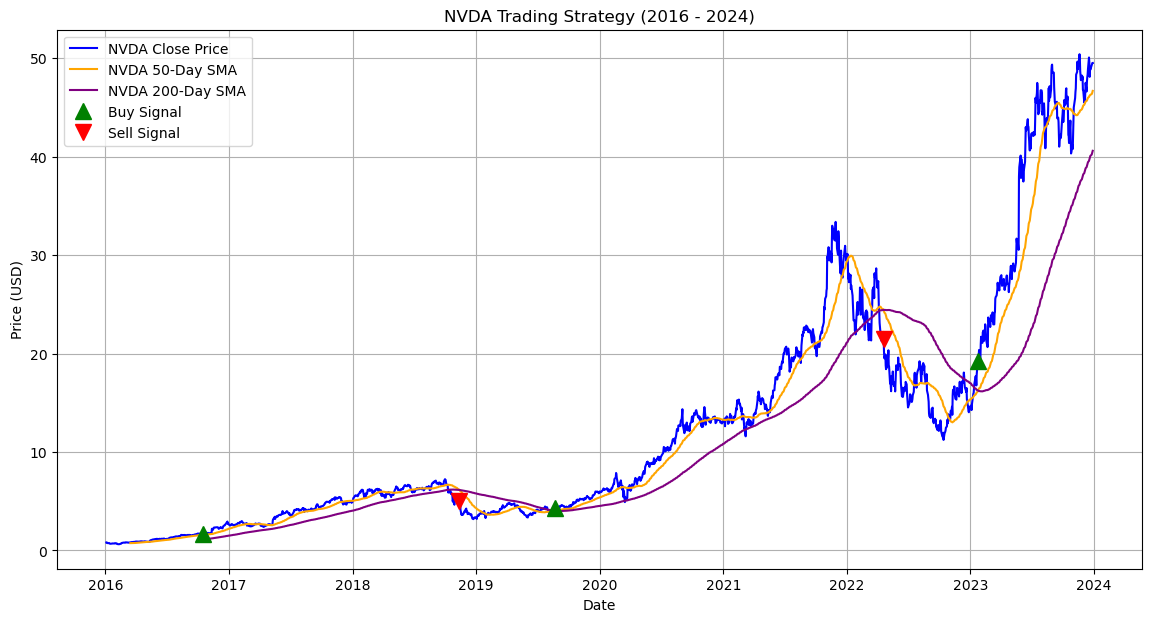

In [37]:
for ticker in tickers:
    plt.figure(figsize=(14, 7))
    
    plt.plot(stock_data.index, stock_data['Close'][ticker], label=f'{ticker} Close Price', color='blue')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_50'], label=f'{ticker} 50-Day SMA', color='orange')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_200'], label=f'{ticker} 200-Day SMA', color='purple')
    
    # Plot buy and sell signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == 2].index, 
             stock_data['Close'][ticker][stock_data[f'{ticker}_Position'] == 2], 
             '^', markersize=12, color='g', lw=0, label='Buy Signal')
        
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == -2].index, 
             stock_data['Close'][ticker][stock_data[f'{ticker}_Position'] == -2], 
             'v', markersize=12, color='r', lw=0, label='Sell Signal')
    
    plt.title(f'{ticker} Trading Strategy (2016 - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


## **Visualizing the Trading Strategy for Each Company**
**Let's plot the closing prices along with the moving averages and the buy/sell signals for each company:**

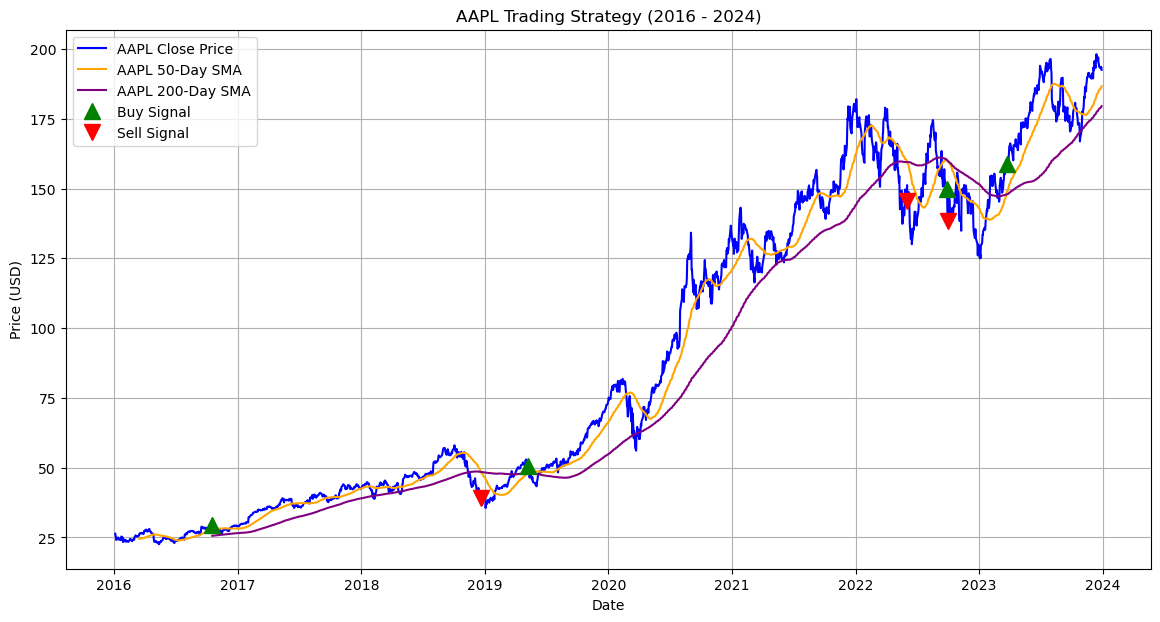

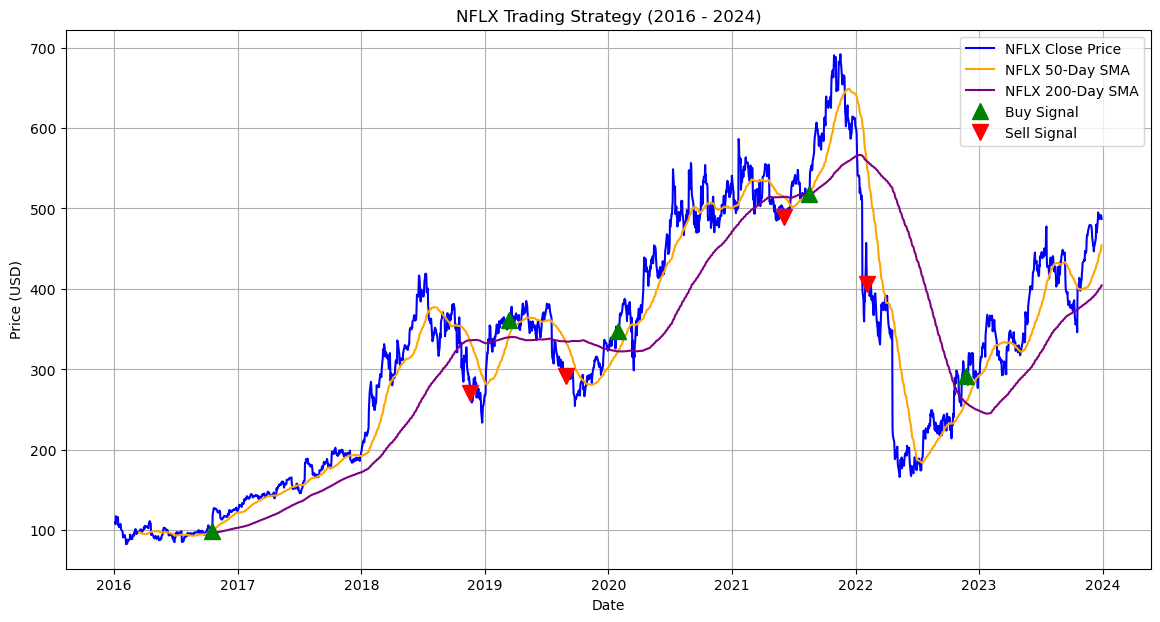

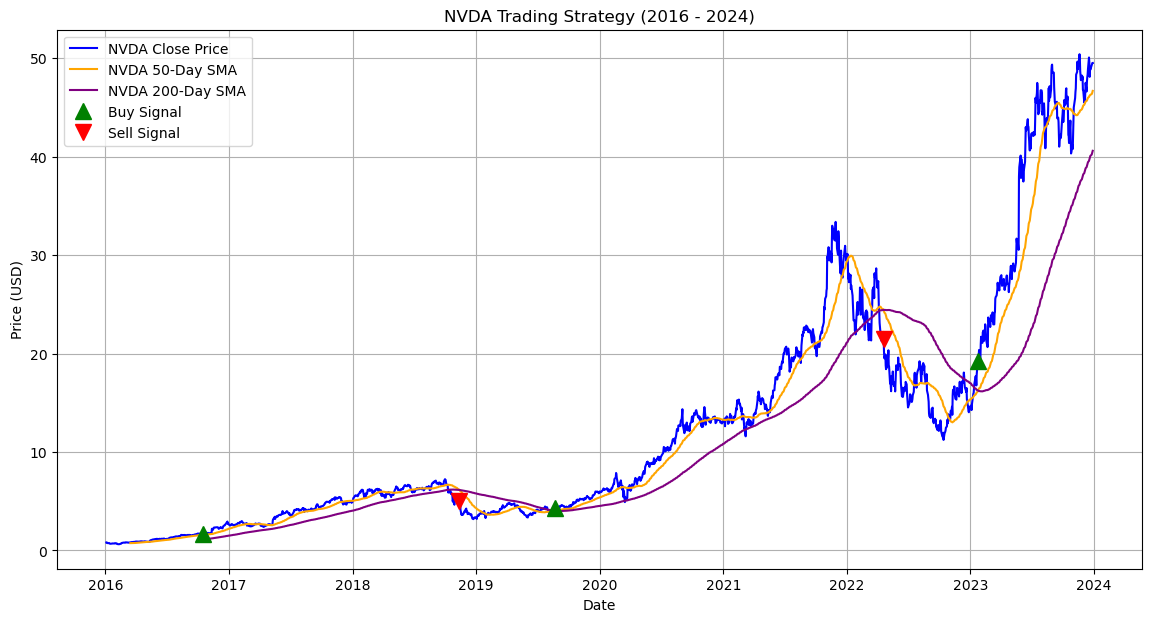

In [42]:
for ticker in tickers:
    plt.figure(figsize=(14, 7))
    
    # Plot the closing price and moving averages
    plt.plot(stock_data.index, stock_data['Close'][ticker], label=f'{ticker} Close Price', color='blue')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_50'], label=f'{ticker} 50-Day SMA', color='orange')
    plt.plot(stock_data.index, stock_data[f'{ticker}_SMA_200'], label=f'{ticker} 200-Day SMA', color='purple')
    
    # Plot the buy signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == 2].index, 
             stock_data['Close'][ticker][stock_data[f'{ticker}_Position'] == 2], 
             '^', markersize=12, color='g', lw=0, label='Buy Signal')
    
    # Plot the sell signals
    plt.plot(stock_data[stock_data[f'{ticker}_Position'] == -2].index, 
             stock_data['Close'][ticker][stock_data[f'{ticker}_Position'] == -2], 
             'v', markersize=12, color='r', lw=0, label='Sell Signal')
    
    plt.title(f'{ticker} Trading Strategy (2016 - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


## Comparing the Cumulative Returns of the Strategies:

**Finally, let's compare the cumulative returns of the trading strategies across the three companies:**



In [15]:
for ticker in tickers:
    # Calculate daily returns
    stock_data[f'{ticker}_Market_Returns'] = stock_data['Close'][ticker].pct_change()
    
    # Calculate strategy returns based on position
    stock_data[f'{ticker}_Strategy_Returns'] = stock_data[f'{ticker}_Market_Returns'] * stock_data[f'{ticker}_Position'].shift(1)
    
    # Calculate cumulative returns
    stock_data[f'{ticker}_Cumulative_Market_Returns'] = (1 + stock_data[f'{ticker}_Market_Returns']).cumprod()
    stock_data[f'{ticker}_Cumulative_Strategy_Returns'] = (1 + stock_data[f'{ticker}_Strategy_Returns']).cumprod()


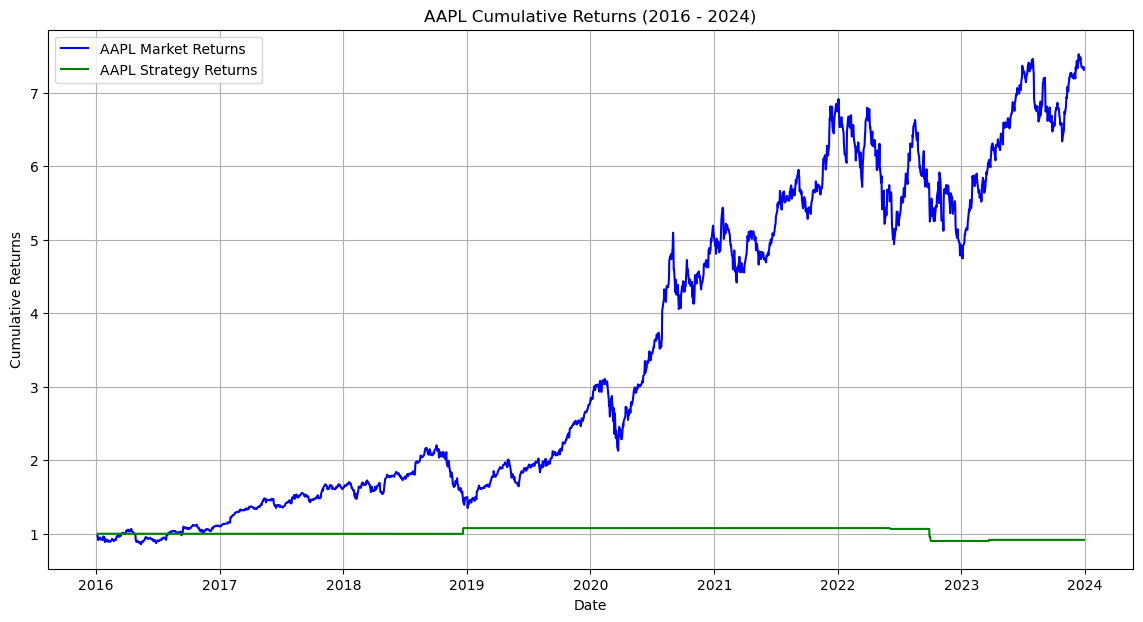

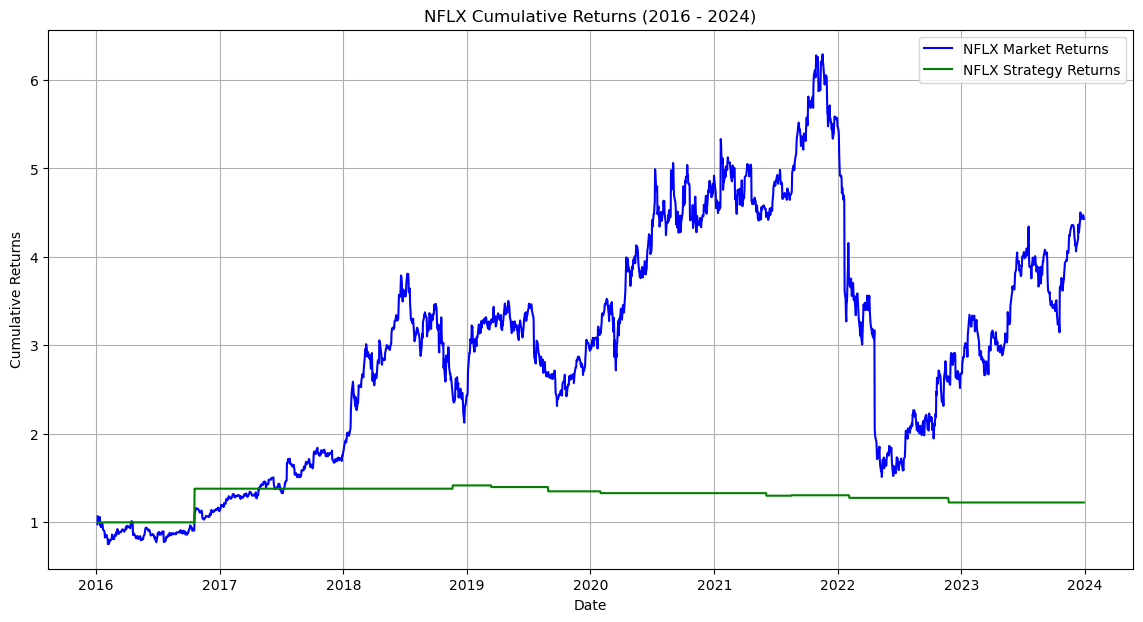

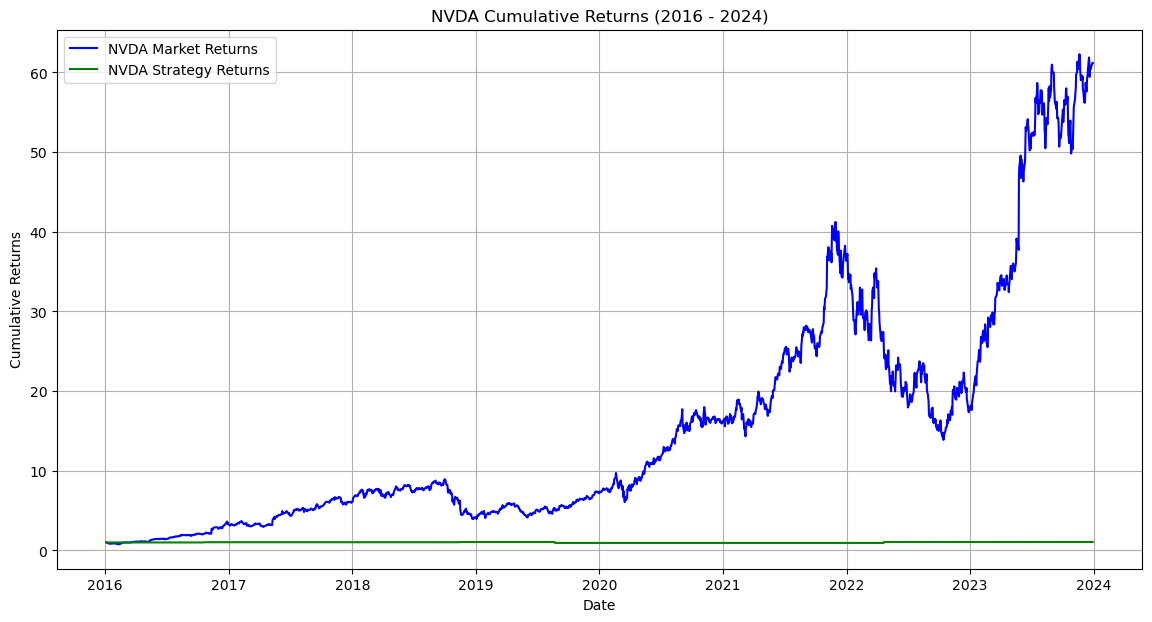

In [16]:
for ticker in tickers:
    plt.figure(figsize=(14, 7))
    
    # Plot cumulative market returns
    plt.plot(stock_data.index, stock_data[f'{ticker}_Cumulative_Market_Returns'], label=f'{ticker} Market Returns', color='blue')
    
    # Plot cumulative strategy returns
    plt.plot(stock_data.index, stock_data[f'{ticker}_Cumulative_Strategy_Returns'], label=f'{ticker} Strategy Returns', color='green')
    
    plt.title(f'{ticker} Cumulative Returns (2016 - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


## Code Example: Simple Moving Average Crossover Strategy

## Trade Decision=f(Price,Volume,Moving Averages,RSI,Momentum,Other Indicators)
**Around the central formula, you can depict each of the inputs:**

1.**Price**: Represented by a line chart showing the price movement over time.

2.**Volume**: A bar chart indicating the trading volume.

3.**Moving Averages:** Two lines (short-term and long-term) crossing each other.

4.**RSI (Relative Strength Index):** An oscillating line within a bounded range (e.g., 0-100) to represent momentum.

5.**Momentum:** An arrow or a gradient that increases as momentum builds.

6.**Other Indicators:** You could use symbols like MACD (Moving Average Convergence Divergence) or Bollinger Bands.

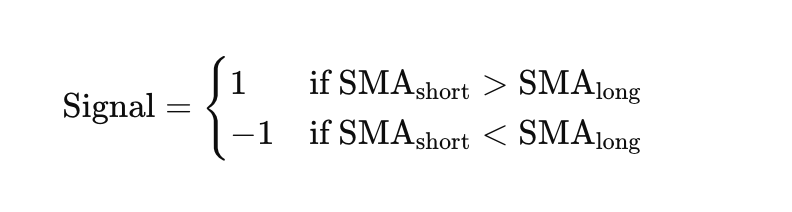

## Visualize the Trap
**Let’s visualize this with Python. We’ll create a scenario where two variables (oil prices and airline stocks) appear to be correlated but have no causal relationship.**

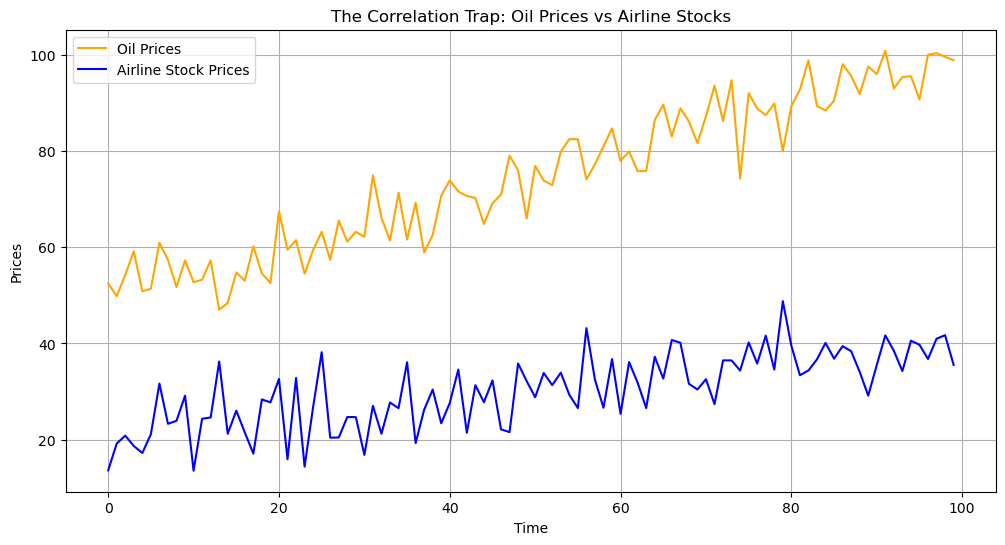

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Create random data to simulate oil prices and airline stock prices
np.random.seed(42)
dates = np.arange(100)
oil_prices = np.linspace(50, 100, 100) + np.random.normal(0, 5, 100)  # Simulated oil prices
airline_stocks = np.linspace(20, 40, 100) + np.random.normal(0, 5, 100)  # Simulated airline stock prices

# Adding a random factor to show no causation
random_factor = np.random.normal(0, 2, 100)
airline_stocks += random_factor

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(dates, oil_prices, label='Oil Prices', color='orange')
plt.plot(dates, airline_stocks, label='Airline Stock Prices', color='blue')
plt.title('The Correlation Trap: Oil Prices vs Airline Stocks')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()
